          Model Name  Training Error  Test Error  Training Time (s)
0   GradientBoost-10        0.353135    0.481848           0.499485
1   GradientBoost-30        0.209571    0.475248           1.291444
2  GradientBoost-100        0.066007    0.490099           4.668478
3  GradientBoost-300        0.000000    0.470297          14.279345
          Model Name  Training Error  Test Error  Training Time (s)
0  GradientBoost-300             0.0    0.470297          14.279345


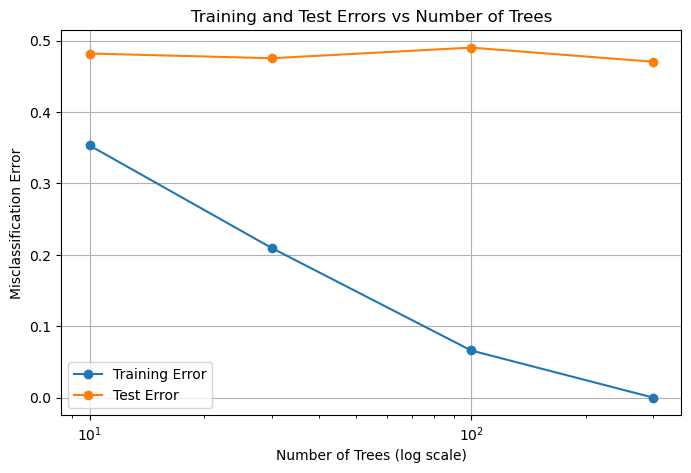

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Y = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\hill-valley\Y.dat")
X = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\hill-valley\X.dat")
Y_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\hill-valley\Ytest.dat")
X_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\hill-valley\Xtest.dat")

regression_trees = [10, 30, 100, 300]

model_names = []
train_error = []
test_error = []
times =[]

for k in regression_trees:
    start_time = time.time()
    
    model=GradientBoostingClassifier(n_estimators=k, random_state=42)
    model.fit(X, Y)

    train_err = 1 - model.score(X,Y)
    test_err = 1 - model.score(X_test, Y_test)
    
    total_t = time.time() - start_time
  
   
    model_names.append(f"GradientBoost-{k}")
    train_error.append(train_err)
    test_error.append(test_err)
    times.append(total_t)
    
    results_df = pd.DataFrame({
    "Model Name": model_names,
    "Training Error": train_error,
    "Test Error": test_error,
    "Training Time (s)": times,
    })

print(results_df)

min_test_error_index = test_error.index(min(test_error))
best_combination = {
    "Model Name": model_names[min_test_error_index],
    "Training Error": train_error[min_test_error_index],
    "Test Error": test_error[min_test_error_index],
    "Training Time (s)": times[min_test_error_index],
}
best_results_df = pd.DataFrame([best_combination])

print(best_results_df)

plt.figure(figsize=(8, 5))
plt.semilogx(regression_trees, train_error, marker='o', label="Training Error")
plt.semilogx(regression_trees, test_error, marker='o', label="Test Error")
plt.xlabel("Number of Trees (log scale)")
plt.ylabel("Misclassification Error")
plt.title("Training and Test Errors vs Number of Trees")
plt.legend()
plt.grid(True)
plt.show()



     Model Name  Training Error  Test Error  Training Time (s)
0   SVM (C=0.1)        0.495050    0.495050           0.123504
1   SVM (C=0.1)        0.486799    0.496700           0.076519
2   SVM (C=0.1)        0.465347    0.485149           0.123355
3   SVM (C=0.1)        0.460396    0.473597           0.134018
4   SVM (C=0.1)        0.448845    0.473597           0.127582
5   SVM (C=0.1)        0.443894    0.466997           0.137821
6   SVM (C=0.1)        0.442244    0.466997           0.141672
7   SVM (C=0.1)        0.437294    0.455446           0.270726
8   SVM (C=0.1)        0.432343    0.450495           0.349961
9   SVM (C=0.1)        0.427393    0.447195           0.352285
10  SVM (C=0.1)        0.427393    0.447195           0.769791
11  SVM (C=0.1)        0.429043    0.447195           0.530599
12  SVM (C=0.1)        0.429043    0.447195           0.596724
13  SVM (C=0.1)        0.429043    0.448845           0.842702
14  SVM (C=0.1)        0.429043    0.445545           2

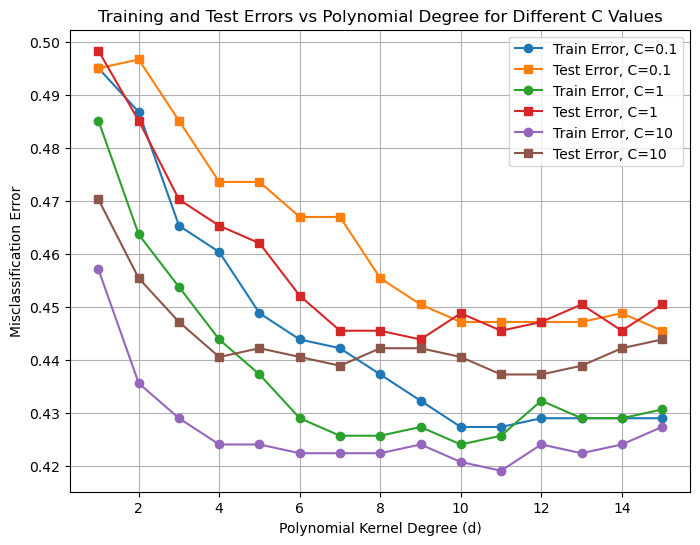

In [3]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

C_values = [0.1, 1, 10]
d_values = list(range(1, 16))

train_error = {C: [] for C in C_values}
test_error = {C: [] for C in C_values}
model_names = {C: [] for C in C_values}
times = {C: [] for C in C_values}

for C in C_values:
    for d in d_values:
        start_time = time.time()
        model = SVC(C=C, kernel='poly', degree=d, random_state=42, cache_size=1000)
        model.fit(X, Y)

        train_err = 1 - model.score(X,Y)
        test_err = 1 - model.score(X_test, Y_test)
    
        total_t = time.time() - start_time
       
        model_names[C].append(f"SVM (C={C})")
        train_error[C].append(train_err)
        test_error[C].append(test_err)
        times[C].append(total_t)

        results_df = pd.DataFrame({
        "Model Name": model_names[C],
        "Training Error": train_error[C],
        "Test Error": test_error[C],
        "Training Time (s)": times[C],
    })

    print(results_df)

best_results = []
for C in C_values:
    for d in d_values:
        min_test_error_idx = np.argmin(test_error[C])
        best_combination = {
            "Model Name": f"SVM (C={C})",
            "Training Error": train_error[C][min_test_error_idx],
            "Test Error": test_error[C][min_test_error_idx],
            "Total Training Time (s)": times[C][min_test_error_idx],
        }

    best_results_df = pd.DataFrame([best_combination])
    print(best_results_df)

plt.figure(figsize=(8, 6))
for C in C_values:
    plt.plot(d_values, train_error[C], label=f'Train Error, C={C}', marker='o')
    plt.plot(d_values, test_error[C], label=f'Test Error, C={C}', marker='s')

plt.xlabel('Polynomial Kernel Degree (d)')
plt.ylabel('Misclassification Error')
plt.title('Training and Test Errors vs Polynomial Degree for Different C Values')
plt.legend()
plt.grid()
plt.show()

       Gamma                              Model Name  Training Error  \
0   0.031250              SVM (C=0.1, gamma=0.03125)        0.493399   
1   0.015625             SVM (C=0.1, gamma=0.015625)        0.493399   
2   0.007812            SVM (C=0.1, gamma=0.0078125)        0.493399   
3   0.003906           SVM (C=0.1, gamma=0.00390625)        0.493399   
4   0.001953          SVM (C=0.1, gamma=0.001953125)        0.493399   
5   0.000977         SVM (C=0.1, gamma=0.0009765625)        0.493399   
6   0.000488        SVM (C=0.1, gamma=0.00048828125)        0.493399   
7   0.000244       SVM (C=0.1, gamma=0.000244140625)        0.493399   
8   0.000122      SVM (C=0.1, gamma=0.0001220703125)        0.493399   
9   0.000061      SVM (C=0.1, gamma=6.103515625e-05)        0.493399   
10  0.000031     SVM (C=0.1, gamma=3.0517578125e-05)        0.493399   
11  0.000015    SVM (C=0.1, gamma=1.52587890625e-05)        0.209571   
12  0.000008    SVM (C=0.1, gamma=7.62939453125e-06)        0.45

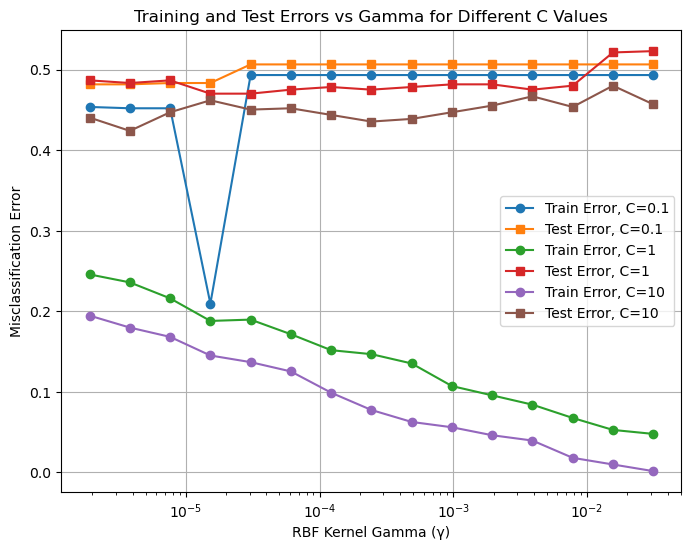

In [15]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

C_values = [0.1, 1, 10]
i_values = list(range(5, 20))
gamma_values = [2**-i for i in i_values]

train_error = {C: [] for C in C_values}
test_error = {C: [] for C in C_values}
model_names = {C: [] for C in C_values}
times = {C: [] for C in C_values}
gamma_list = {C: [] for C in C_values} 

for C in C_values:
    for gamma in gamma_values:
        start_time = time.time()
        model = SVC(C=C, kernel='rbf', gamma=gamma, random_state=42)
        model.fit(X, Y)

        train_err = 1 - model.score(X, Y)
        test_err = 1 - model.score(X_test, Y_test)

        total_t = time.time() - start_time

        model_names[C].append(f"SVM (C={C}, gamma={gamma})")
        train_error[C].append(train_err)
        test_error[C].append(test_err)
        times[C].append(total_t)
        gamma_list[C].append(gamma)  
        
        results_df = pd.DataFrame({
            "Gamma": gamma_list[C],
            "Model Name": model_names[C],  
            "Training Error": train_error[C],
            "Test Error": test_error[C],
            "Training Time (s)": times[C],
        })

    print(results_df)
    
best_results = []
for C in C_values:
    min_test_error_idx = np.argmin(test_error[C])
    best_combination = {
        "Gamma": gamma_list[C][min_test_error_idx],
        "Model Name": f"SVM (C={C})",
        "Training Error": train_error[C][min_test_error_idx],
        "Test Error": test_error[C][min_test_error_idx],
        "Total Training Time (s)": times[C][min_test_error_idx],
    }

best_results_df = pd.DataFrame([best_combination])
print(best_results_df)

plt.figure(figsize=(8, 6))
for C in C_values:
    plt.semilogx(gamma_values, train_error[C], label=f'Train Error, C={C}', marker='o')
    plt.semilogx(gamma_values, test_error[C], label=f'Test Error, C={C}', marker='s')

plt.xlabel('RBF Kernel Gamma (γ)')
plt.ylabel('Misclassification Error')
plt.title('Training and Test Errors vs Gamma for Different C Values')
plt.legend()
plt.grid()
plt.show()